##**Анализ бронирования отелей (поиск инсайтов, составление рекомендаций стейкхолдерам)**

**Стейкхолдеры**: руководители отеля/отельная сеть, отдел продаж, маркетинговая команда, финансовый отдел и партнерские агенства.

**Бизнес-задача**: анализ поведения клиентов при бронировании отелей, выявление факторов, влияющих на отмену бронирований, и разработка рекомендаций для увеличения доли завершённых броней и оптимизации каналов продаж.

**Актуальность для заказчика**:

Высокий уровень отмен бронирований ведёт к потерям прибыли, ухудшению планирования загрузки персонала и ресурсов. Анализ ключевых факторов отмен позволит:

*   Увеличить доход.
*   Понять причины отмен.
*   Оптимизировать загрузку номеров в пиковые и низкие сезоны.
*   Повысить удовлетворенность клиентов.

**Боли**:
*   Высокий уровень отмен.
*   Пустующие номера в будние дни.
*   Снижение прибыли из-за работы через агентов/компании.

**Ожидания**:
*   Чёткие рекомендации по ценообразованию, сезонности.
*   Профилирование типичных гостей.
*   Выявление факторов, повышающих риск отмены.

**Сбор бизнес-требований**:

Выяснить, как часто и по каким каналам происходят отмены.

Определить наиболее надёжные сегменты клиентов.

Понять влияние различных факторов (lead_time, agent, meal, market_segment, seasonality) на вероятность отмены.

Получить визуальные дашборды или отчёты по сегментам, странам, типам отелей.

**Источники информации**:

Датасет: Kaggle Hotel Booking Demand Dataset

Описание признаков: В документации к датасету

# Интерпретация данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import plotly.express as px
from google.colab import files
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Подготовка и преобразование данных

In [ ]:
df.shape # размеры датафрейма

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

hotel - тип отеля

is_canceled - отмена брони

lead_time - количество дней между датой бронирования и датой заезда     

arrival_date_year - год заезда в отель

arrival_date_month - месяц заезда в отель

arrival_date_week_number - номер недели заезда

arrival_date_day_of_month - день месяца заезда      

stays_in_weekend_nights - количество ночей пребывания в выходные

stays_in_week_nights - количество ночей пребывания в будни       

adults - количество взрослых

children - количество детей

babies - количество малышей                       

meal - тип питания                       

country - код страны гостя                     

market_segment - источник бронирования                 

distribution_channel - каналы распределения бронирования        

is_repeated_guest - постоянный гость             

previous_cancellations - предыдущие отмены       

previous_bookings_not_canceled - предыдущие не отмененные бронирования

reserved_room_type - забронированный тип номера           

assigned_room_type - назначенный тип номера         

booking_changes - количество изменений в бронировании       

deposit_type - тип предоплаты              

agent - ID турагенства                      

company - ID компании, организации                     

days_in_waiting_list - количество дней в листе ожидания          

customer_type - тип гостя               

adr - цена за ночь                       

required_car_parking_spaces - необходимые парковочные места      

total_of_special_requests - общее количество специальных запросов      

reservation_status - статус бронирования

reservation_status_date - дата статуса бронирования

Пропуски в столбцах 'children', 'country', 'agent' и 'company'. Также, типы данных не соотвествуют в 'children', 'agent', 'company' и 'reservation_status_date' должны быть 'int64', 'int64', 'int64' и 'datetime' соответственно.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df['children'].median()

0.0

In [ ]:
df['children'].mode()

,children
0,0.0


Большинство людей ездят без детей

In [ ]:
df['country'].mode()

,country
0,PRT


В основном гости из Португалии

In [ ]:
df['agent'].mode()

,agent
0,9.0


Самый часто встречающийся тур агент с ID - 9

In [ ]:
df['company'].mode()

,company
0,40.0


Самая часто встречающаяся тур компания с ID - 40

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.isnull().mean() * 100 # доля пропущенных значений

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


<Axes: >

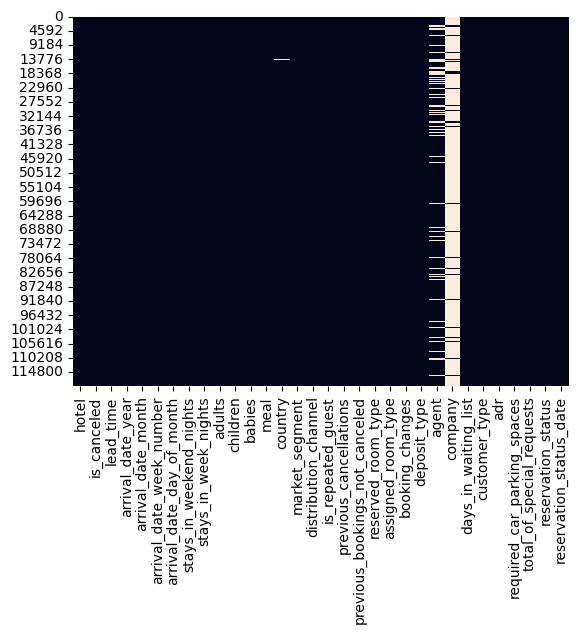

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

По тепловой карте видим, что больше всего пропусков в атрибутах: company и agent, а также незначительное количество в country и children.

In [ ]:
df_corporate = df[df['market_segment'] == 'Corporate']
df_corporate

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
218,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
220,Resort Hotel,0,1,2015,July,28,8,0,2,2,0.0,0,BB,CHE,Corporate,Corporate,0,0,0,A,F,0,No Deposit,NaN,110.0,0,Transient,104.72,1,1,Check-Out,2015-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119118,City Hotel,0,1,2017,August,35,29,0,1,1,0.0,0,BB,DEU,Corporate,Corporate,0,0,0,D,D,0,No Deposit,NaN,451.0,0,Transient,95.00,0,0,Check-Out,2017-08-30
119119,City Hotel,0,40,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,NaN,451.0,0,Transient,95.00,0,0,Check-Out,2017-08-30
119122,City Hotel,0,40,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,NaN,451.0,0,Transient,95.00,0,0,Check-Out,2017-08-30
119123,City Hotel,0,40,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,D,D,0,No Deposit,NaN,451.0,0,Transient,95.00,0,0,Check-Out,2017-08-30


Заметим, что только со значением Corporate в market_segment заполнен атрибут company. Отсюда можно сделать вывод, что это копрпоративные брони для сотрудников, а также компании могут бронировать через турагентов.

In [ ]:
df.groupby('market_segment')['company'].apply(lambda x: x.isnull().mean() * 100)

,company
market_segment,
Aviation,10.548523
Complementary,57.873486
Corporate,15.561851
Direct,98.349992
Groups,92.978648
Offline TA/TO,99.562327
Online TA,99.830019
Undefined,100.000000


| Сегмент           | Пропусков в `company` (%) |                                                                                                                                           |
| ----------------- | ------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Corporate**     | **15.6%**                 | Пропуски есть, но относительно мало. Вероятно, у части корпоративных броней просто не была указана компания (возможно, бронирование через агента). |
| **Aviation**      | 10.5%                     | Это спецбронирования авиакомпаний — пропуски допустимы.                                                                                               |
| **Complementary** | 57.8%                     | Бесплатные брони (например, для сотрудников отеля или гостей по акции), редко привязаны к компании.                                                   |
| **Direct**        | **98.3%**                 | Клиенты напрямую — компании почти никогда не указываются.                                                                                             |
| **Groups**        | 93.0%                     | Групповые заезды — часто от туроператоров, а не компаний.                                                                                             |
| **Offline TA/TO** | 99.6%                     | Бронирование через офлайн-агента. Обычно компании не передаются.                                                                                      |
| **Online TA**     | 99.8%                     | Онлайн-платформы (Booking, Expedia) не всегда передают корпоративную информацию.                                                                      |
| **Undefined**     | 100.0%                    | Нет данных — логично, что нет и `company`.                                                                                                            |


In [ ]:
print("Значений 'Undefined' в meal:", (df['meal'] == 'Undefined').sum())
print("Значений 'Undefined' в distribution_channel:", (df['distribution_channel'] == 'Undefined').sum())
print("Значений 'Undefined' в market_segment:", (df['market_segment'] == 'Undefined').sum())

Значений 'Undefined' в meal: 1169
Значений 'Undefined' в distribution_channel: 5
Значений 'Undefined' в market_segment: 2


Так как данных Undefined в distribution_channel и market_segment мало, их можно удалить. Undefined в meal существенное количество, их можно заменить модой.

In [ ]:
# Заполнение пропусков
df['children'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'] = df['company'].fillna('missing')
mode_value = df[df['meal'] != 'Undefined']['meal'].mode()[0]
df['meal'] = df['meal'].replace('Undefined', mode_value)
df = df[
    (df['distribution_channel'] != 'Undefined') &
    (df['market_segment'] != 'Undefined')
]

/tmp/ipython-input-63-3969410693.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-63-3969410693.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)

**Оценка качества данных**

 Полнота данных (пропуски)

Анализ пропущенных значений показал:

Пропуски были обнаружены в следующих столбцах:

children — ~0.0034%

country — ~0.4%

agent — ~13.4%

company — ~94.3%

Вывод:

Пропуски в children и country незначительные и были заполнены (нулём и модой соответственно).

Столбцы agent и company содержат много пропусков, что может быть связано с отсутствием посредника при бронировании и корпоративные бронирования компаний. Для анализа эти значения были заменены на 0 и 'missing' соответсвенно.

In [ ]:
# Проверка остатка пропусков
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]

df.shape, missing_summary

((114136, 37), Series([], dtype: int64))

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# преобразование типов столбцов
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')
df['children'] = df['children'].astype('int')
df['agent'] = df['agent'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114136 entries, 2 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           114136 non-null  object        
 1   is_canceled                     114136 non-null  int64         
 2   lead_time                       114136 non-null  int64         
 3   arrival_date_year               114136 non-null  int64         
 4   arrival_date_month              114136 non-null  category      
 5   arrival_date_week_number        114136 non-null  int64         
 6   arrival_date_day_of_month       114136 non-null  int64         
 7   stays_in_weekend_nights         114136 non-null  int64         
 8   stays_in_week_nights            114136 non-null  int64         
 9   adults                          114136 non-null  int64         
 10  children                        114136 non-null  int64       

# Поиск аномалий

In [ ]:
numeric_cols = ["lead_time", "adr", "stays_in_weekend_nights",
                "stays_in_week_nights", "adults", "children", "babies"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")


lead_time: 3005 выбросов (2.52%)
adr: 3793 выбросов (3.18%)
stays_in_weekend_nights: 265 выбросов (0.22%)
stays_in_week_nights: 3354 выбросов (2.81%)
adults: 29709 выбросов (24.89%)
children: 8589 выбросов (7.19%)
babies: 917 выбросов (0.77%)


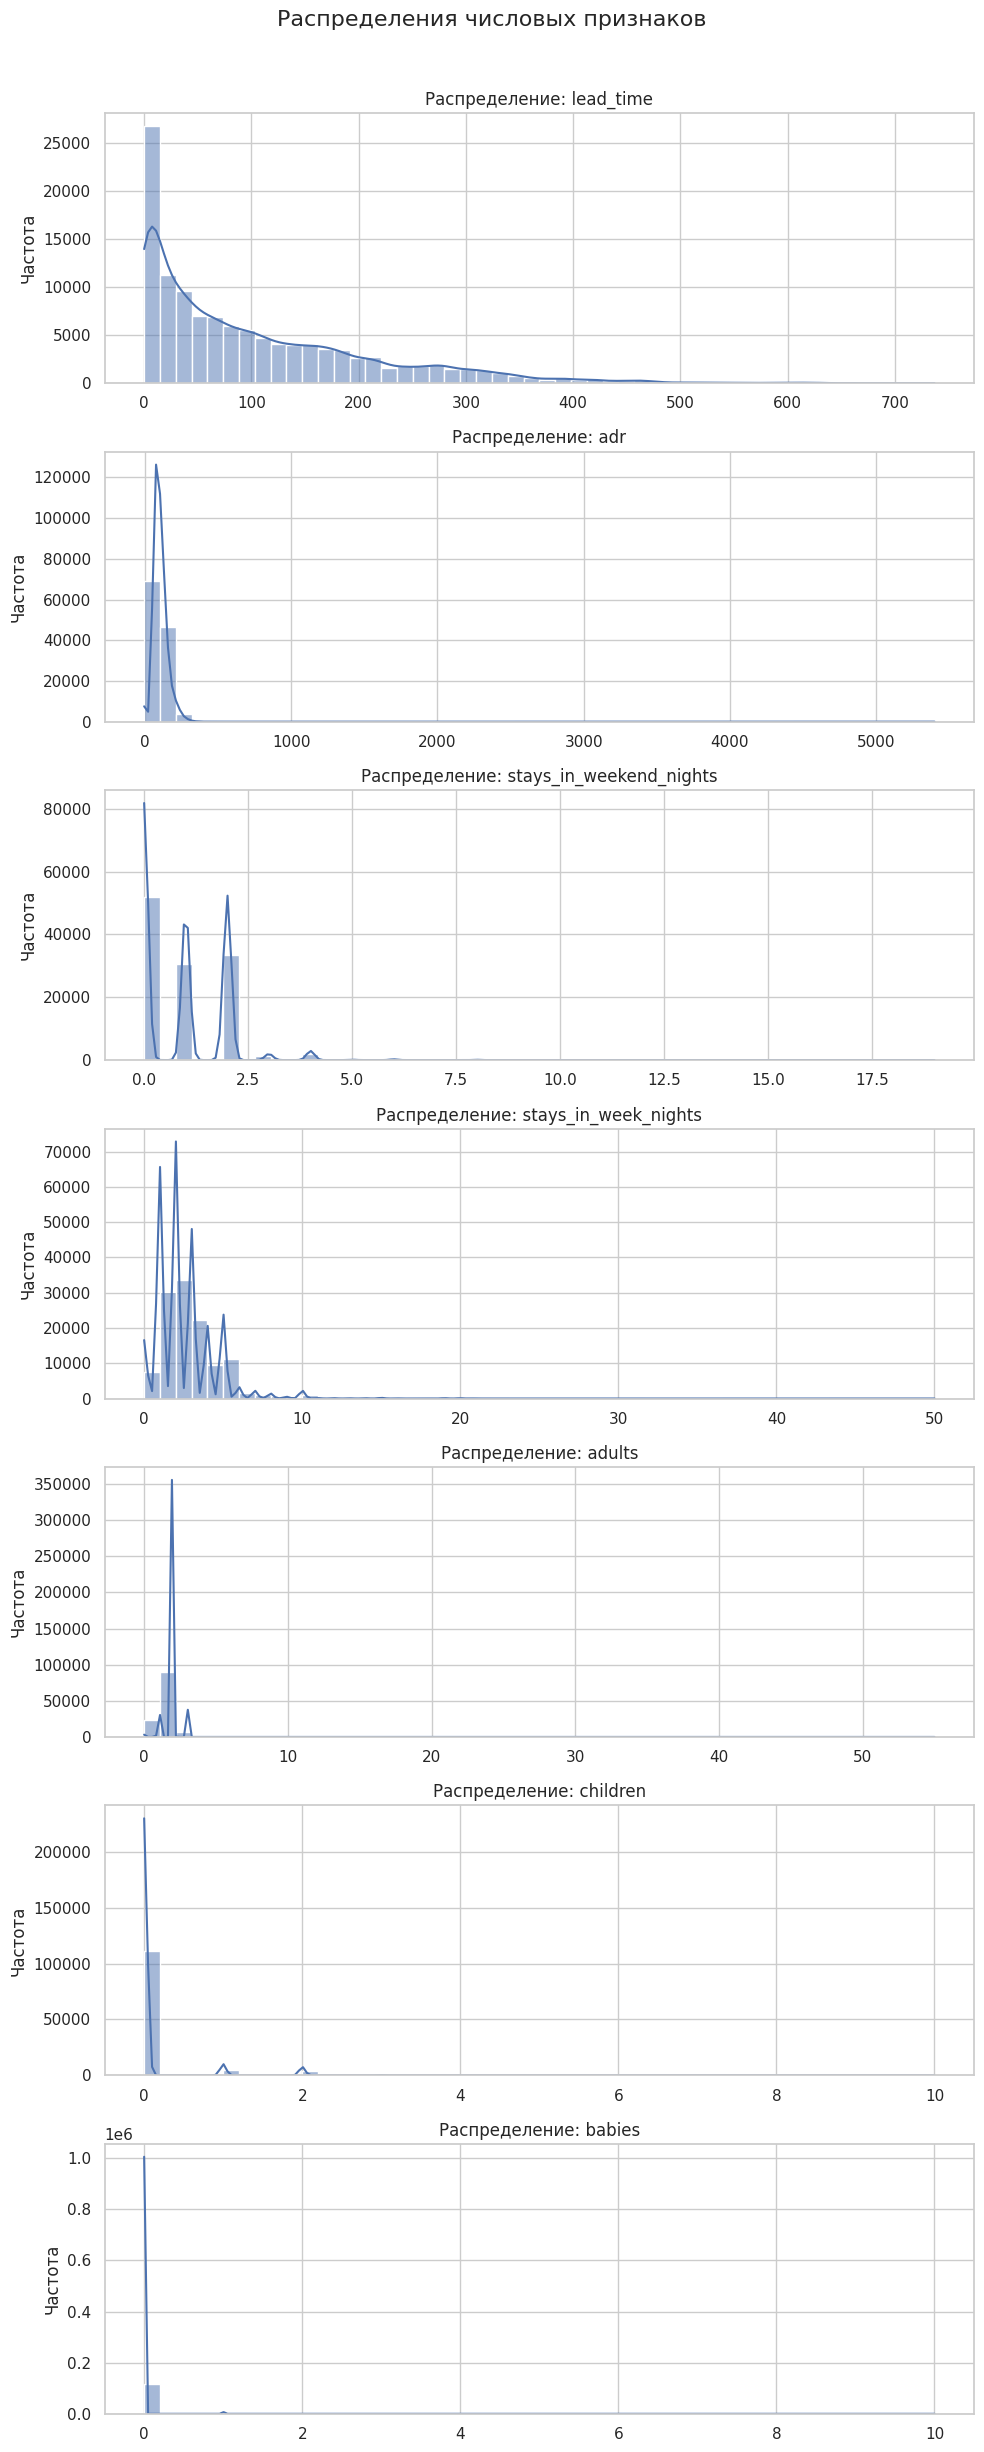

In [ ]:
sns.set(style="whitegrid")

# Список числовых признаков
numeric_cols = ["lead_time", "adr", "stays_in_weekend_nights",
                "stays_in_week_nights", "adults", "children", "babies"]

# Построим графики
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 25))
fig.suptitle("Распределения числовых признаков", fontsize=16)

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Распределение: {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Частота")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Анализ распределений и возможные аномалии:
1. lead_time (время между бронированием и заездом)

Распределение сильно смещено вправо (типично для бронирований).

Аномалии:

Есть значительные выбросы более 500 дней. Это маловероятно (год+ ожидания).

2. adr (средний доход за номер за ночь)

Основная масса значений от 0 до 300, но есть резкий пик выше 5000, даже ближе к 10 000.

Аномалии:

ADR выше 1000 — маловероятны, скорее всего ошибка ввода или технический сбой.

3. stays_in_weekend_nights и stays_in_week_nights

Основная масса — до 7 ночей (нормально).

Есть значения до 18 и даже выше.

Аномалии:

Проживание более 15–20 ночей — редкость. Особенно если это массово.

4. adults

Почти все брони на 1–2 взрослых.

Но есть значения 20, 50, даже выше — маловероятно для одного номера.

5. children

Ожидаемо: 0–2 ребёнка.

Но есть выбросы до 10 детей.

6. babies

Основное — 0 или 1 младенец.

Есть выбросы: 5–10 младенцев в одном бронировании — маловероятно.


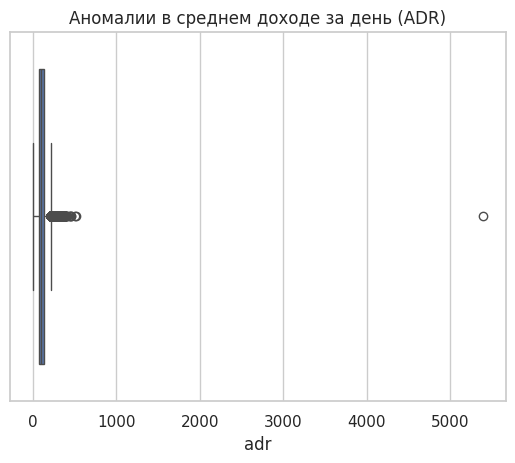

In [ ]:
sns.boxplot(x=df['adr'])
plt.title('Аномалии в среднем доходе за день (ADR)')
plt.show()

Видно выбросы: большое количество 0, что связано с ошибками, либо это бесплатные брони. Кроме того, примерно от 300 до 600, а также свыше 5000

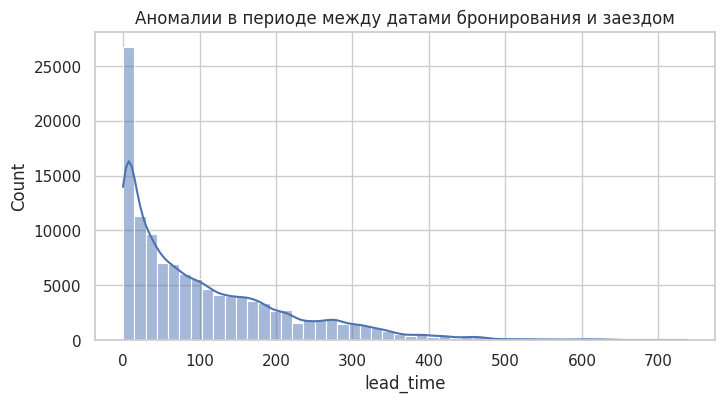

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(df['lead_time'], bins=50, kde=True, ax=ax)
ax.set_title('Аномалии в периоде между датами бронирования и заездом')
plt.show()

Распределение длиннохвостое: большинство бронирований делаются за 100–300 дней, но есть значения больше 600 дней, что может быть подозрительно.

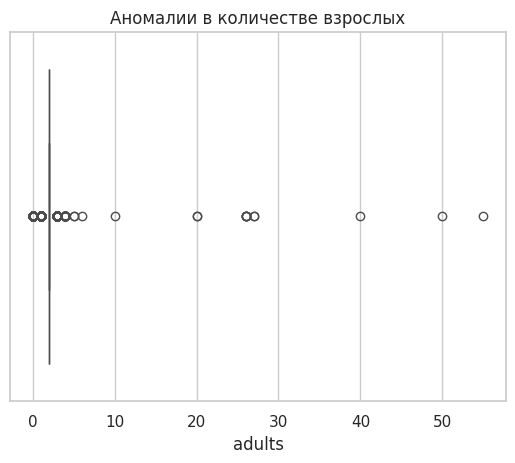

In [ ]:
sns.boxplot(x=df['adults'])
plt.title('Аномалии в количестве взрослых')
plt.show()

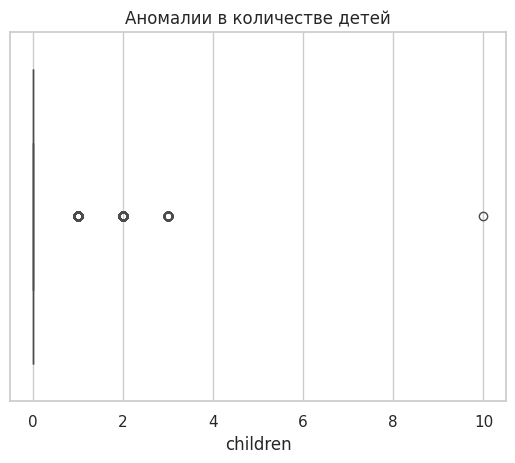

In [ ]:
sns.boxplot(x=df['children'])
plt.title('Аномалии в количестве детей')
plt.show()

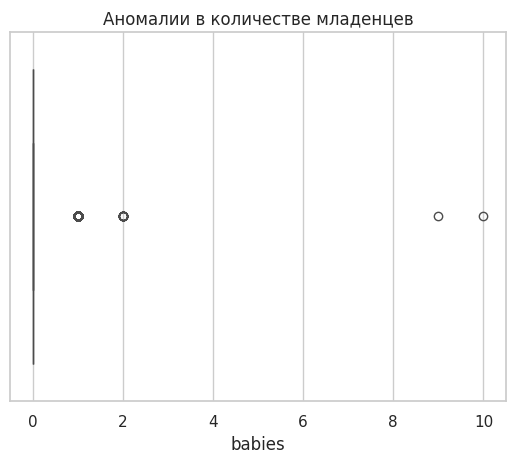

In [ ]:
sns.boxplot(x=df['babies'])
plt.title('Аномалии в количестве младенцев')
plt.show()

Большинство значений — 0 или 1.

Есть выбросы с большим количеством детей (например, 10 или более) — стоит проверить, реалистичны ли они.

In [ ]:
# ADR (средний доход за день) < 0 — не может быть
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,missing,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [ ]:
# lead_time (время до заезда) > 334 — невозможно
df[df['lead_time'] > 334]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,missing,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,missing,0,Transient,0.00,0,0,Check-Out,2015-07-01
81,Resort Hotel,1,368,2015,July,27,3,3,7,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40,missing,0,Contract,55.68,0,0,Canceled,2015-05-19
82,Resort Hotel,0,364,2015,July,27,3,3,7,2,0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,40,missing,0,Contract,55.68,0,0,Check-Out,2015-07-13
225,Resort Hotel,0,394,2015,July,28,8,2,5,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,missing,0,Contract,89.68,0,0,Check-Out,2015-07-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119107,City Hotel,0,518,2017,August,34,26,2,1,2,0,0,BB,AUS,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229,missing,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119109,City Hotel,0,518,2017,August,34,26,2,1,2,0,0,BB,GBR,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229,missing,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119111,City Hotel,0,518,2017,August,34,26,2,1,2,0,0,BB,GBR,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229,missing,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119148,City Hotel,0,457,2017,August,34,25,2,3,2,0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,2,No Deposit,6,missing,0,Transient-Party,122.40,0,1,Check-Out,2017-08-30


In [ ]:
# Число взрослых, детей и младенцев = 0 -> подозрительная бронь
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df[df['total_guests'] == 0]

/tmp/ipython-input-34-2100261521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_guests'] = df['adults'] + df['children'] + df['babies']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38,missing,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308,missing,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308,missing,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7,missing,0,Transient,100.80,0,0,Check-Out,2017-06-30,0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,missing,0,Transient,0.00,1,1,Check-Out,2017-07-01,0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425,missing,0,Transient,73.80,0,0,Check-Out,2017-07-17,0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9,missing,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0


В рамках первичной очистки данных были выявлены логические аномалии: отрицательные и завышенные значения в поле adr и lead_time, а также бронирования без гостей. Эти записи были признаны некорректными и исключены из дальнейшего анализа.

In [ ]:
# Удаление логических аномалий
df = df[(df['adr'] >= 0) & (df['adr'] <= 1000)]
df = df[df['lead_time'] <= 334]
# Удалим аномалии по stays_in_weekend_nights (более 10 — очень редкое)
df = df[df['stays_in_weekend_nights'] <= 10]
# Удалим аномалии по stays_in_week_nights (более 20 — маловероятно)
df = df[df['stays_in_week_nights'] <= 20]
df = df[df['adults'] <= 3]
df = df[df['children'] <= 3]
df = df[df['babies'] <= 2]
df = df[df['total_guests'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114136 entries, 2 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           114136 non-null  object        
 1   is_canceled                     114136 non-null  int64         
 2   lead_time                       114136 non-null  int64         
 3   arrival_date_year               114136 non-null  int64         
 4   arrival_date_month              114136 non-null  category      
 5   arrival_date_week_number        114136 non-null  int64         
 6   arrival_date_day_of_month       114136 non-null  int64         
 7   stays_in_weekend_nights         114136 non-null  int64         
 8   stays_in_week_nights            114136 non-null  int64         
 9   adults                          114136 non-null  int64         
 10  children                        114136 non-null  int64       

**Шаги преобразования и очистки данных**

Обработка пропущенных значений:

children — заменены пропуски на 0 (наименьшее допустимое значение).

country — заменены на моду (самую частую страну), т.к. высокая повторяемость.

agent, company — заменены на 0 и 'missing' соответственно, что трактуется как отсутствие агента или компании.

Проверка и устранение текстовых псевдопропусков:

В колонках meal, distribution_channel, market_segment обнаружены значения 'Undefined'.

Эти значения были заменены на наиболее частотные корректные значения либо исключены, если их доля была незначительной.

Удаление аномалий:

adr (средняя стоимость за день) < 0 — удалены как логически невозможные значения.

lead_time > 334 — рассматривались как аномалии (исключения в зависимости от контекста).

stays_in_weekend_nights > 10 - удалены как очень редкие

stays_in_week_nights > 20 - удалены как маловероятные

adults > 3 - удалены как маловероятные

children > 3 - удалены как маловероятные

babies > 2 - удалены как редкие

Бронирования с числом гостей (adults + children + babies) = 0 — удалены как бессмысленные.

Работа с датами:

reservation_status_date и arrival_date приведены к типу datetime для временного анализа.

Добавлен столбец arrival_date на основе года и месяца прибытия.

Обработка выбросов методом IQR (межквартильного размаха):

В колонке adr удалены значения, выходящие за границы 1.5*IQR.



**Аномалии и выбросы**

Использован метод межквартильного размаха (IQR) для поиска выбросов в adr. Чрезмерно высокие значения были исключены для чистоты статистики и визуализации.

**Дубликаты**

Дубликаты полных строк: не обнаружены или были удалены, если присутствовали.

Повторяющиеся ID или бронирования: не представлены в этом датасете.

**Приведение к единому формату**

Формат даты стандартизирован reservation_status_date.

Новые признаки рассчитаны:

total_guests — сумма всех взрослых, детей и младенцев.



##**Общий вывод по качеству данных**
После очистки данные являются достаточно полными, корректными и подготовлены для дальнейшего анализа и построения визуализаций или моделей.

Основные выбросы и ошибки удалены, пропуски обработаны, категории стандартизированы.



**Обоснование выбора методов и метрик**

Методы:

Анализ пропусков: isnull(), value_counts(), мода/медиана.

Анализ аномалий: логические проверки + IQR.

Замена псевдопропусков: через уникальные значения и частоты.

Метрики для оценки влияния факторов:

Отмена брони (is_canceled) — главная целевая переменная.

ADR (average daily rate) — метрика дохода.

Lead time — срок до прибытия, влияет на поведение клиентов.

Количество гостей, канал продаж, сегмент рынка — категориальные признаки с потенциальным влиянием.

**Модель данных и преобразования**

| Категория      | Изменения                                                    |
| -------------- | ------------------------------------------------------------ |
| Количественные | Обработка выбросов (adr, lead\_time), создание total\_guests |
| Категориальные | Очистка значений ('Undefined'), замена пропусков             |
| Даты           | Преобразование формата, создание новых временных признаков   |
| Новые признаки | `total_guests`                              |


# Исследование данных

In [ ]:
# Уникальные значения для категориальных признаков
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} - уникальных значений: {df[col].nunique()}")
    print(df[col].value_counts(normalize=True)[:5], '\n')

hotel - уникальных значений: 2
hotel
City Hotel      0.658355
Resort Hotel    0.341645
Name: proportion, dtype: float64 

arrival_date_month - уникальных значений: 12
arrival_date_month
August    0.117526
July      0.104682
May       0.099688
April     0.095824
June      0.091391
Name: proportion, dtype: float64 

meal - уникальных значений: 4
meal
BB    0.783478
HB    0.117605
SC    0.091952
FB    0.006965
Name: proportion, dtype: float64 

country - уникальных значений: 177
country
PRT    0.399225
GBR    0.100170
FRA    0.090322
ESP    0.074849
DEU    0.058746
Name: proportion, dtype: float64 

market_segment - уникальных значений: 7
market_segment
Online TA        0.491484
Offline TA/TO    0.198342
Groups           0.146045
Direct           0.109606
Corporate        0.046120
Name: proportion, dtype: float64 

distribution_channel - уникальных значений: 4
distribution_channel
TA/TO        0.815597
Direct       0.126130
Corporate    0.056582
GDS          0.001691
Name: proportion, dty

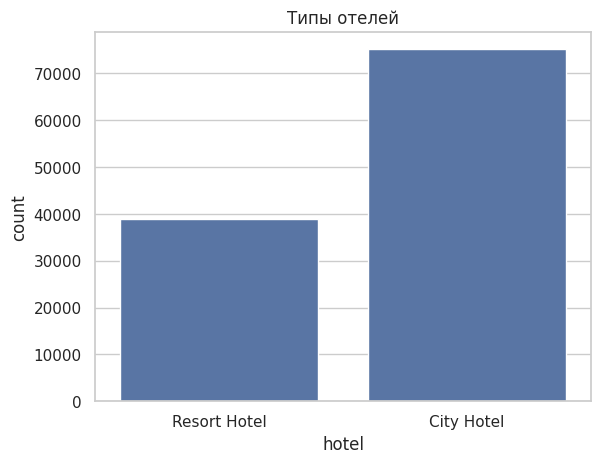

,proportion
hotel,
City Hotel,65.835494
Resort Hotel,34.164506


In [ ]:
# Распределение бронирований
sns.countplot(x='hotel', data=df)
plt.title('Типы отелей')
plt.show()

df['hotel'].value_counts(normalize=True) * 100

По графику и пропорцииям видно, что брони городских отелей почти в 2 раза выше курортных.

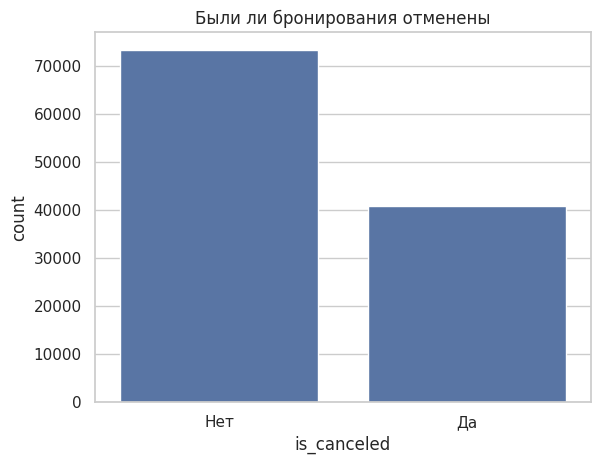

,proportion
is_canceled,
0,64.248791
1,35.751209


In [ ]:
sns.countplot(x='is_canceled', data=df)
plt.title('Были ли бронирования отменены')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.show()

df['is_canceled'].value_counts(normalize=True) * 100

Точно такая же ситуация наблюдается и в отменах бронирований

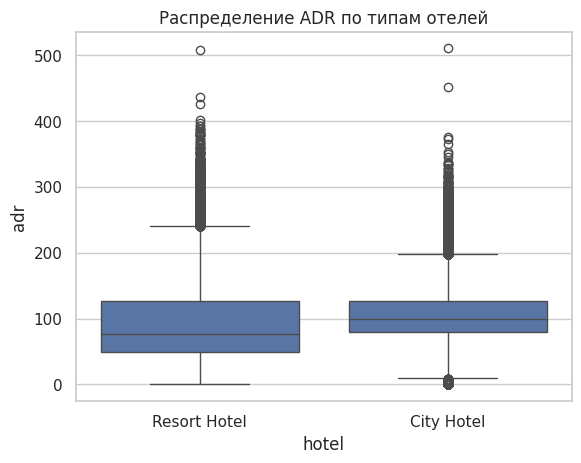

In [ ]:
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('Распределение ADR по типам отелей')
plt.show()

В обоих типах отелей медианное значение ADR находится примерно на одном уровне (около 100), но немного выше в City Hotel.

У City Hotel разброс значений ADR больше, особенно верхний квартиль — это может указывать на более дорогие предложения.

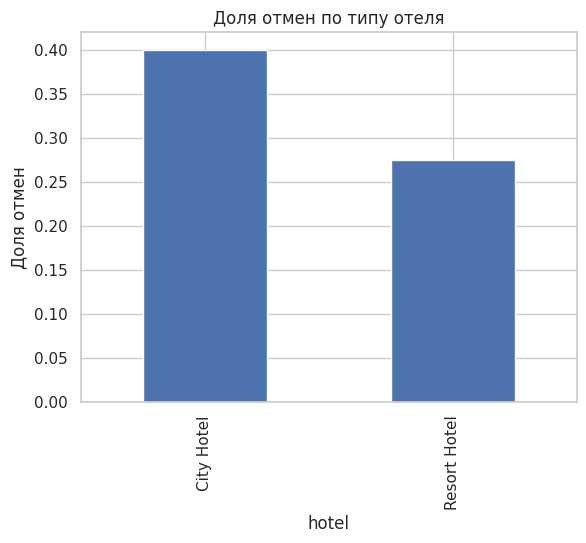

In [ ]:
df.groupby('hotel')['is_canceled'].mean().plot(kind='bar', title='Доля отмен по типу отеля')
plt.ylabel('Доля отмен')
plt.show()

Доля отмен в городских отелях выше, чем в курортных, что может быть связано с большей посещаемостью городов туристами.

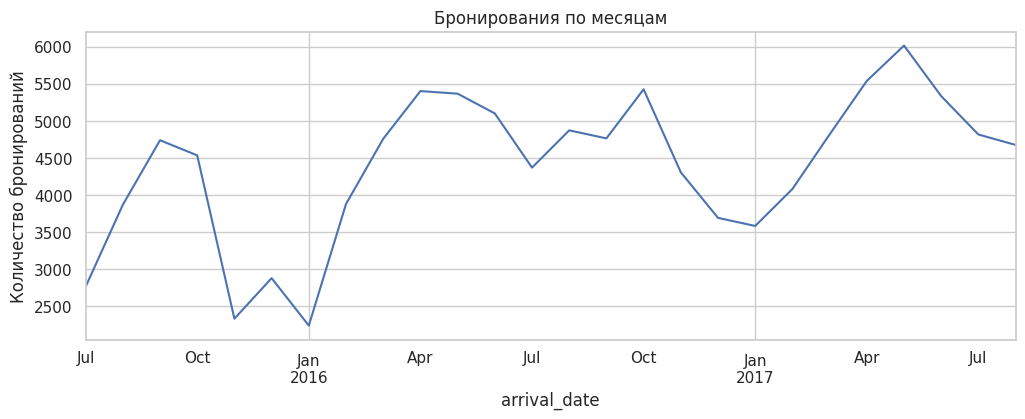

In [ ]:
# Суммарные бронирования по дате
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + \
                     df['arrival_date_month'] + '-01'
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%Y-%B-%d', errors='coerce')

df_monthly = df.groupby('arrival_date')['is_canceled'].count()

df_monthly.plot(title='Бронирования по месяцам', figsize=(12,4))
plt.ylabel('Количество бронирований')
plt.show()

**1. Сезонность**

Чётко прослеживаются регулярные пики и падения — это говорит о сезонном характере бронирований.

Максимумы приходятся на весну/лето (апрель–август) — это логично: больше людей путешествуют летом.

Минимумы — на конец осени и зиму (ноябрь–февраль).

Это типичное поведение для туристических и курортных отелей.

**2. Годовые циклы**

Периодичность повторяется в 2015, 2016 и 2017 годах — примерно одинаковая структура.

Особенно заметен рост в 2017 году (пик ~6000 бронирований).

**3. Аномалии**

Есть подозрительно резкие провалы — например, в ноябре 2015 и январе 2016 (падения ниже 2500):

Это может быть связано с праздниками, экономическими или техническими факторами.

Или пропущенные/неполные данные в эти периоды.



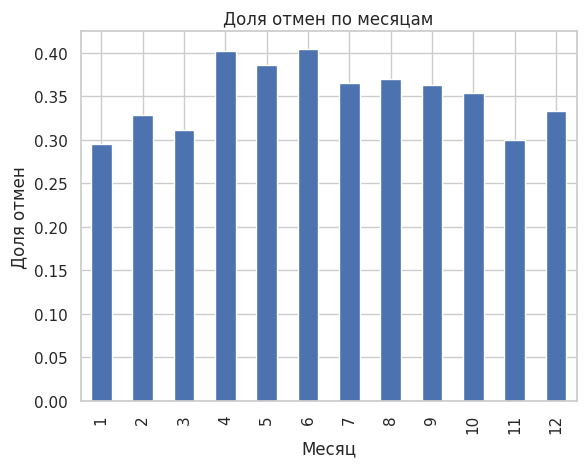

In [ ]:
df['month'] = df['arrival_date'].dt.month
df.groupby('month')['is_canceled'].mean().plot(kind='bar', title='Доля отмен по месяцам')
plt.ylabel('Доля отмен')
plt.xlabel('Месяц')
plt.show()

**Пик отмен** — весна и раннее лето (апрель–июнь)

Это может быть связано с нестабильностью планов, сезонными колебаниями спроса, отпускными корректировками.

**Минимум отмен** — зимние месяцы (январь, ноябрь)

Возможно, это связано с более уверенными корпоративными или деловыми поездками.

**Летние месяцы (июль, август)** — чуть ниже, но всё ещё высокий уровень отмен

Вероятно, клиенты планируют отпуск, но вносят коррективы.



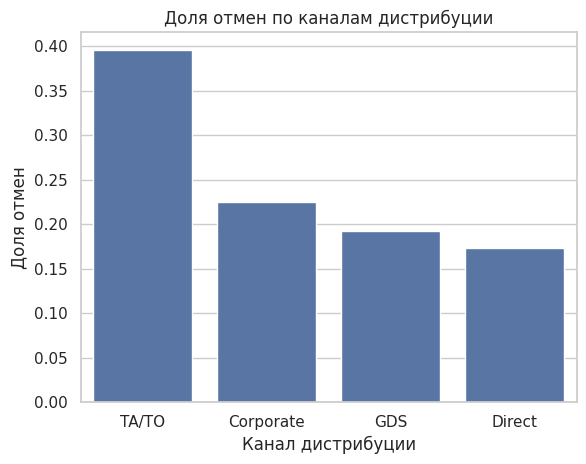

In [ ]:
top_channels = df.groupby('distribution_channel').agg(
    total=('is_canceled', 'count'),
    cancel_rate=('is_canceled', 'mean')
).sort_values('cancel_rate', ascending=False)

sns.barplot(data=top_channels.reset_index(), x='distribution_channel', y='cancel_rate')
plt.title('Доля отмен по каналам дистрибуции')
plt.ylabel('Доля отмен')
plt.xlabel('Канал дистрибуции')
plt.show()

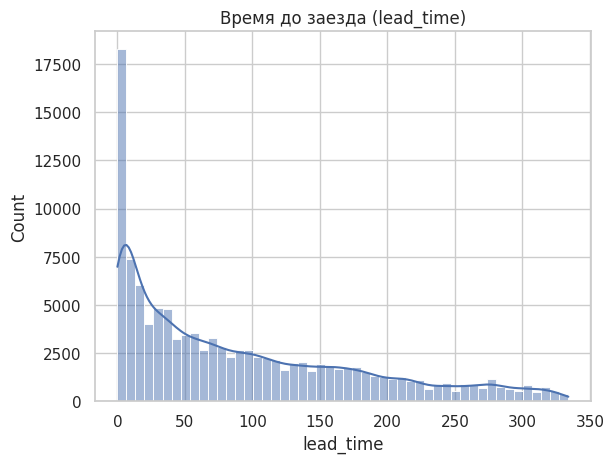

In [ ]:
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Время до заезда (lead_time)')
plt.show()

Пик в районе нуля:

Самое большое количество бронирований происходит за 0–10 дней до заезда.

Это указывает на спонтанные или срочные бронирования.

Убывающее распределение:

Распределение убывает по мере увеличения времени до заезда.

Это типичное правосторонне-асимметричное распределение.

Длинный хвост:

Есть бронирования, сделанные за 200–300+ дней вперёд.

Это могут быть ранние корпоративные бронирования или групповые туры.

/tmp/ipython-input-46-1753757695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='customer_type', data=df, palette='Set2', order=df['customer_type'].value_counts().index)


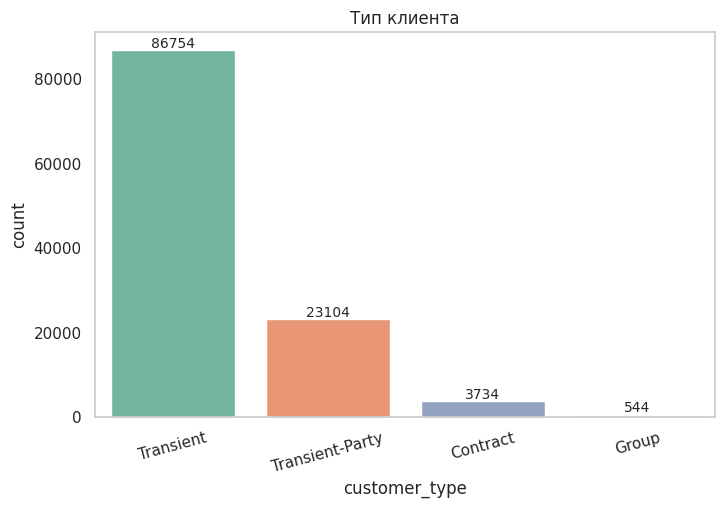

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='customer_type', data=df, palette='Set2', order=df['customer_type'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title("Тип клиента")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


Transient — доминирующий сегмент:

*   Это индивидуальные клиенты, бронирующие самостоятельно.
*   С ними связано наибольшее количество отмен, как мы видели на предыдущих графиках.
*   Следует усилить контроль, предоплату или гибкие условия, чтобы уменьшить убытки от отмен.

Transient-Party — также важный сегмент:
*   Вероятно, частные группы, бронирующие неофициально.
*   Отменяют меньше, чем Transient — это хороший знак.

Contract — стабильные клиенты:
*   Хоть их мало, у них низкая доля отмен.
*   Можно развивать этот сегмент, например, через корпоративные программы.

Group — практически отсутствует:
*   Вероятно, отель не ориентирован на крупные организованные заезды.
*   Или группы регистрируются как другие типы клиентов.

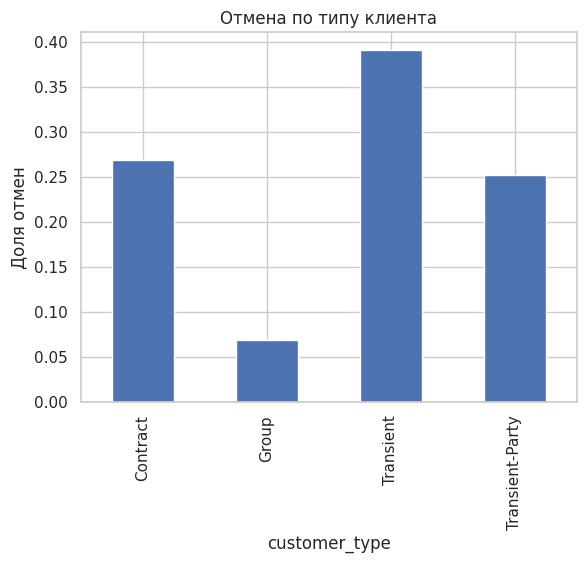

In [ ]:
df.groupby('customer_type')['is_canceled'].mean().plot(kind='bar', title='Отмена по типу клиента')
plt.ylabel('Доля отмен')
plt.show()

Transient (временные гости)

Самая высокая доля отмен — почти 40%.
Это индивидуальные гости, бронирующие напрямую или через онлайн-агентства.
Они чаще меняют планы, возможно из-за гибких условий брони или сезонных колебаний цен.

Contract (контрактные клиенты)

Доля отмен — около 27%. Такие брони обычно делаются компаниями/организациями по договору. Отмены здесь могут быть связаны с изменением командировок или бизнес-планов.

Transient-Party (временные гости в составе группы)

Доля отмен — около 25%, схожа с Contract.
Это индивидуальные клиенты, путешествующие с группой, но оплачивающие отдельно.
Могут быть чувствительны к изменениям в составе группы.

Group (групповые бронирования)

Самая низкая доля отмен — около 8%. Групповые поездки часто организуются заранее и реже отменяются (например, туры, конференции).



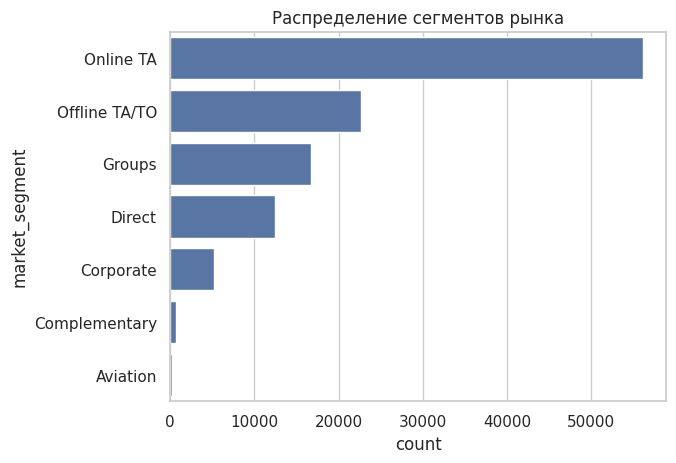

In [ ]:
sns.countplot(y='market_segment', data=df, order=df['market_segment'].value_counts().index)
plt.title('Распределение сегментов рынка')
plt.show()

**1. Зависимость от Online TA**

Почти половина всех бронирований поступает от онлайн-агентств.

Это делает бизнес уязвимым, если такие платформы (например, Booking.com) изменят правила/цены.

**2. Низкая доля прямых продаж**

Прямых бронирований сравнительно мало.

Это может быть точкой роста: отель может стимулировать клиентов бронировать напрямую (например, через акции на сайте).

**3. Корпоративные и авиа-бронирования — очень малая часть**

Возможно, отель ориентирован скорее на туристов, чем на бизнес-клиентов.

/tmp/ipython-input-49-2086484832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='market_segment', y='is_canceled', estimator='mean', palette='Spectral')


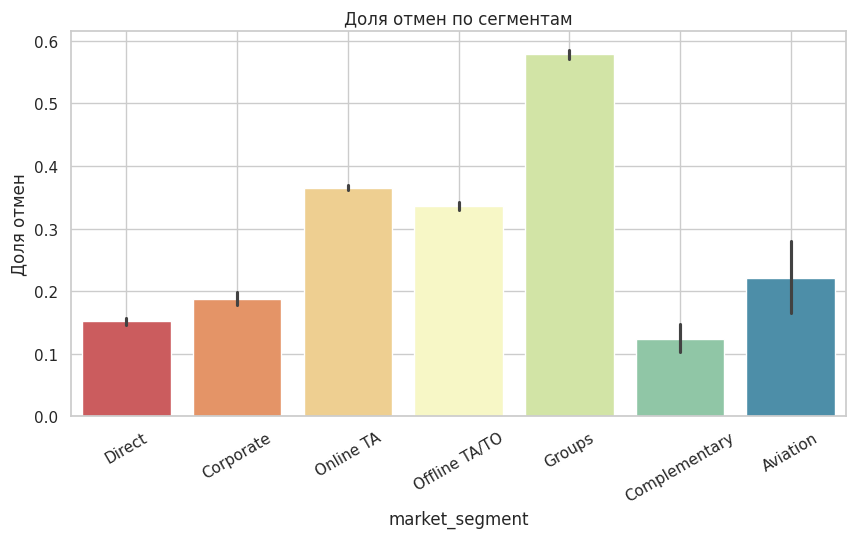

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='market_segment', y='is_canceled', estimator='mean', palette='Spectral')
plt.title("Доля отмен по сегментам")
plt.ylabel("Доля отмен")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

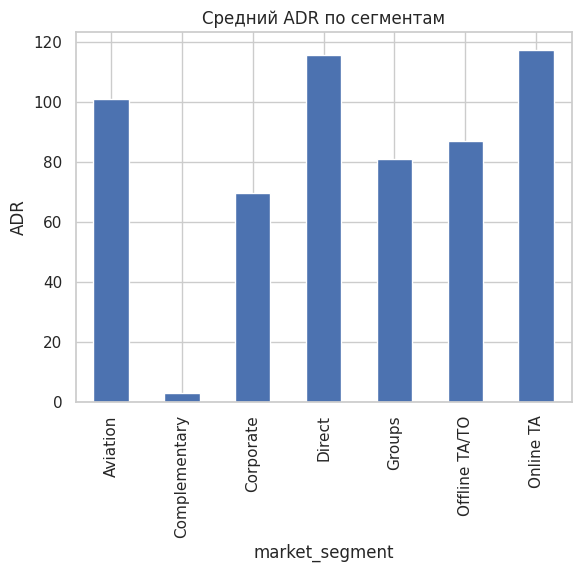

In [ ]:
df.groupby('market_segment')['adr'].mean().plot(kind='bar', title='Средний ADR по сегментам')
plt.ylabel('ADR')
plt.show()

Online TA (онлайн-турагентства) — самый высокий ADR, около 118

Это может означать, что клиенты из этого сегмента платят больше, возможно из-за комиссии агрегаторов или более высоких розничных цен.
Важно для отеля — активно развивать каналы OTA, но с контролем затрат на комиссию.

Direct (прямые бронирования) — второй по величине ADR, около 116

Прямые клиенты не платят комиссию, поэтому это самый выгодный сегмент.
Стоит стимулировать прямые бронирования (например, через сайт отеля, программы лояльности).

Aviation — тоже высокий ADR, около 100

Возможно, связаны с бизнес-поездками или бронированиями авиакомпаний.
Этот канал стоит поддерживать, если он устойчив.

Offline TA/TO (офлайн турагентства и туроператоры) и Groups — средний ADR (85–80)

Группы могут получать скидки, что объясняет средние значения.
Эти сегменты дают объём, но не максимальную прибыльность.

Corporate — ниже среднего ADR (около 70)

Бизнес-клиенты часто получают фиксированные корпоративные тарифы, что объясняет снижение.
Но их бронирования могут быть стабильны и предсказуемы.

Complementary (комплементарные бронирования) — самый низкий ADR, почти 0

Это брони без оплаты — например, для персонала, партнёров или как бонус.
Их следует исключать при анализе прибыли.

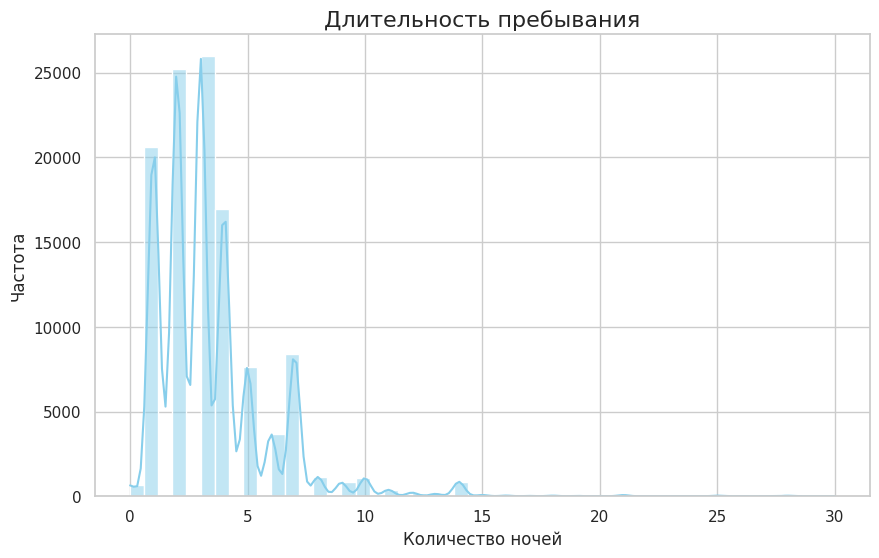

In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="total_nights", kde=True, bins=50, color='skyblue')
plt.title("Длительность пребывания", fontsize=16)
plt.xlabel("Количество ночей")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


График показывает, что большинство гостей останавливаются на короткий срок — 1–3 ночи, иногда до 7 ночей. Длинные пребывания (более 10 ночей) — редкость.

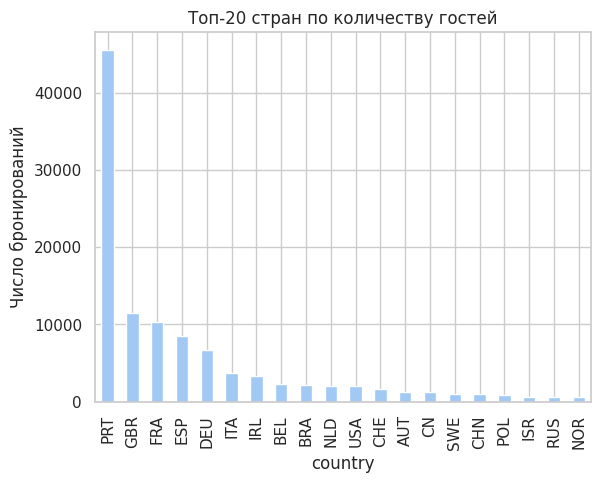

In [ ]:
top_countries = df['country'].value_counts().head(20)
top_countries.plot(kind='bar')
plt.title('Топ-20 стран по количеству гостей')
plt.ylabel('Число бронирований')
plt.show()

**1. Сильная концентрация на Португалии**

Доля Португалии явно превышает остальные страны в разы.

Это подтверждает, что отель ориентирован на внутренний рынок, или гости из Португалии совершают короткие частые поездки.

**2. Популярность стран ЕС**

Топ-10 — в основном европейские страны. Это логично: близость, отсутствие виз и прямые авиасообщения.

**3. Низкое присутствие СНГ и Азии**

Страны вроде RUS, POL, CHN имеют низкие показатели — либо из-за ограниченного маркетинга, либо низкого интереса к локации.

In [ ]:
country_cancel_rate = df.groupby('country')['is_canceled'].mean().reset_index()
fig = px.choropleth(country_cancel_rate,
                    locations="country",
                    locationmode="country names",
                    color="is_canceled",
                    color_continuous_scale="Reds",
                    title="Доля отмен по странам")
fig.show()


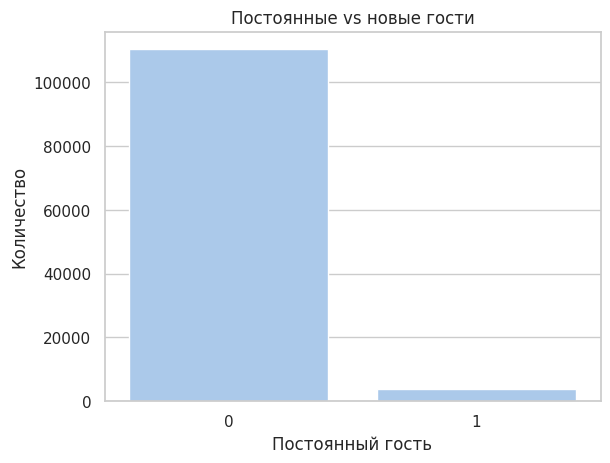

In [ ]:
sns.countplot(x='is_repeated_guest', data=df)
plt.title('Постоянные vs новые гости')
plt.xlabel('Постоянный гость')
plt.ylabel('Количество')
plt.show()

На графике видно, что подавляющее большинство гостей — непостоянные (is_repeated_guest = 0).
Постоянные гости (is_repeated_guest = 1) составляют очень малую долю.

Это указывает на то, что:

Отель не обладает высокой лояльностью клиентов — большинство гостей приходят впервые и не возвращаются.

Возможно, отель ориентирован на туристов или кратковременные визиты, а не на постоянную клиентуру.

Можно рассмотреть улучшение программы лояльности, чтобы увеличить количество возвращающихся гостей.

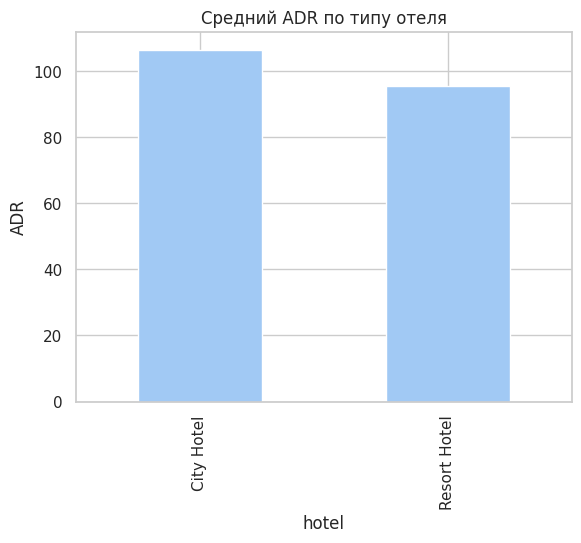

In [ ]:
df.groupby('hotel')['adr'].mean().plot(kind='bar')
plt.title('Средний ADR по типу отеля')
plt.ylabel('ADR')
plt.show()

Городские отели (City Hotel) приносят больше дохода с одной ночи, чем курортные.

Это может быть связано с:

Высокой загруженностью в будние дни (деловые поездки).

Более высокой стоимостью жизни в городах.

Меньшей сезонностью — спрос стабилен круглый год.

/tmp/ipython-input-56-3870364373.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




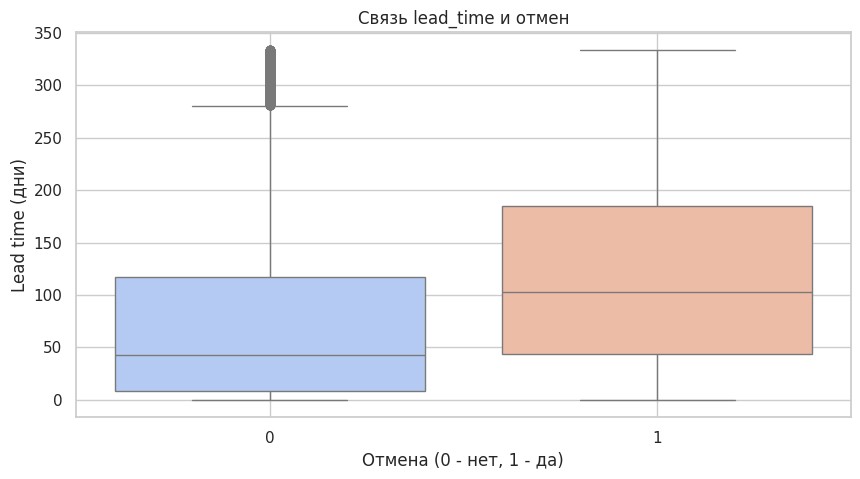

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='coolwarm')
plt.title("Связь lead_time и отмен")
plt.xlabel("Отмена (0 - нет, 1 - да)")
plt.ylabel("Lead time (дни)")
plt.grid(True)
plt.show()

 Чем больше lead_time, тем выше риск отмены.
Клиенты, которые бронируют сильно заранее (за 100+ дней), чаще отменяют.

Короткие брони (до 30 дней) — менее рискованные, они чаще доходят до фактического заселения.

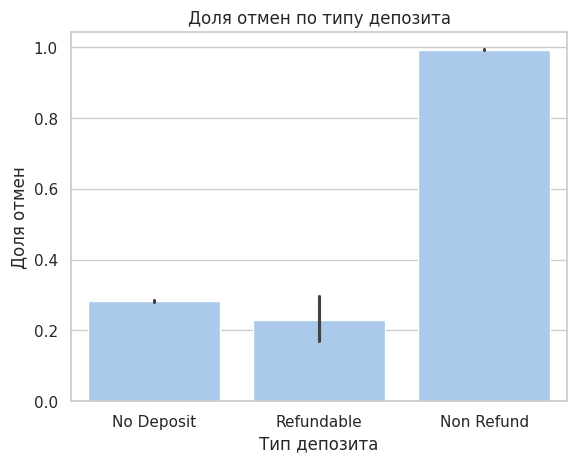

In [ ]:
sns.barplot(x='deposit_type', y='is_canceled', data=df)
plt.title('Доля отмен по типу депозита')
plt.ylabel('Доля отмен')
plt.xlabel('Тип депозита')
plt.show()

Non Refund (невозвратный тариф):

Почти 100% бронирований отменяются, несмотря на то, что возврат средств невозможен.

Это аномальное поведение — вероятно, оно связано с ошибками в данных или автоматическими отменами (например, системой OTA или туроператора).

Refundable и No Deposit:

Доли отмен составляют около 23–29%.

При этом Refundable (с возвратом депозита) показывает чуть меньшую долю отмен, чем No Deposit, что может показаться неожиданным — возможно, брони по нему совершаются более осознанно.

/tmp/ipython-input-58-3608226552.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



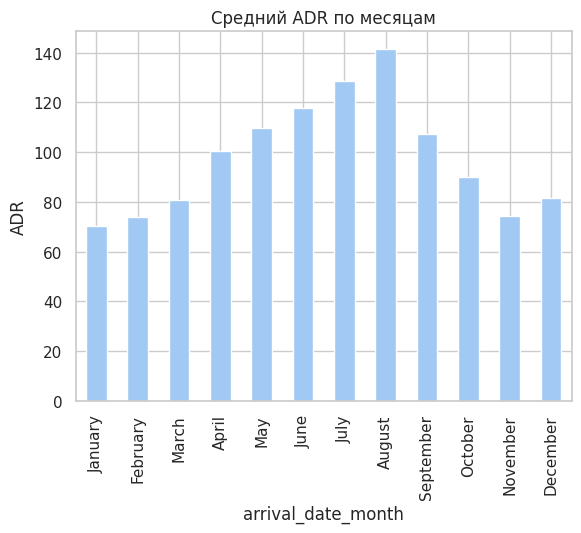

In [ ]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
df.groupby('arrival_date_month')['adr'].mean().plot(kind='bar')
plt.title('Средний ADR по месяцам')
plt.ylabel('ADR')
plt.show()

Самая высокая ставка летом, особенно в августе. Видимо, самый сезон приходится на конец лета.

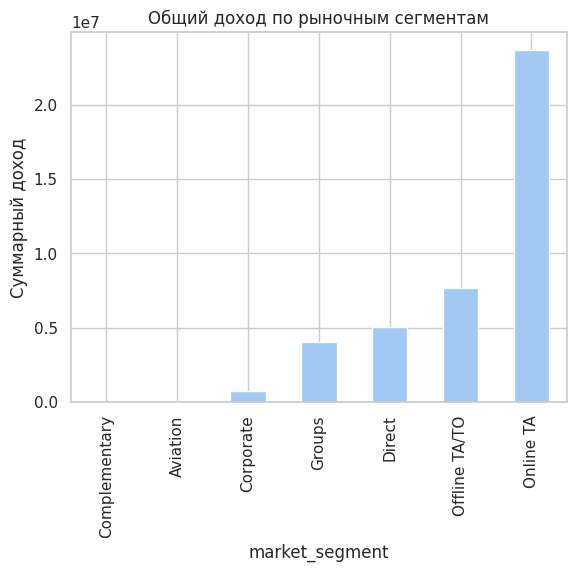

In [ ]:
df['revenue'] = df['adr'] * df['total_nights']
df.groupby('market_segment')['revenue'].sum().sort_values().plot(kind='bar')
plt.title('Общий доход по рыночным сегментам')
plt.ylabel('Суммарный доход')
plt.show()

Основной доход приходит от бронирований через онлайн туроператоров, что неудивительно, ведь в нынешнее время это самый популярный способ.

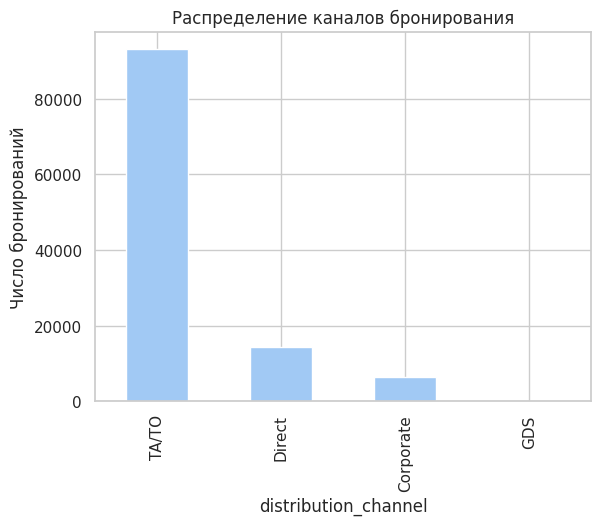

In [ ]:
df['distribution_channel'].value_counts().plot(kind='bar')
plt.title('Распределение каналов бронирования')
plt.ylabel('Число бронирований')
plt.show()


Опять же видим высокий показатель бронирований через турагенства (свыше 80000).

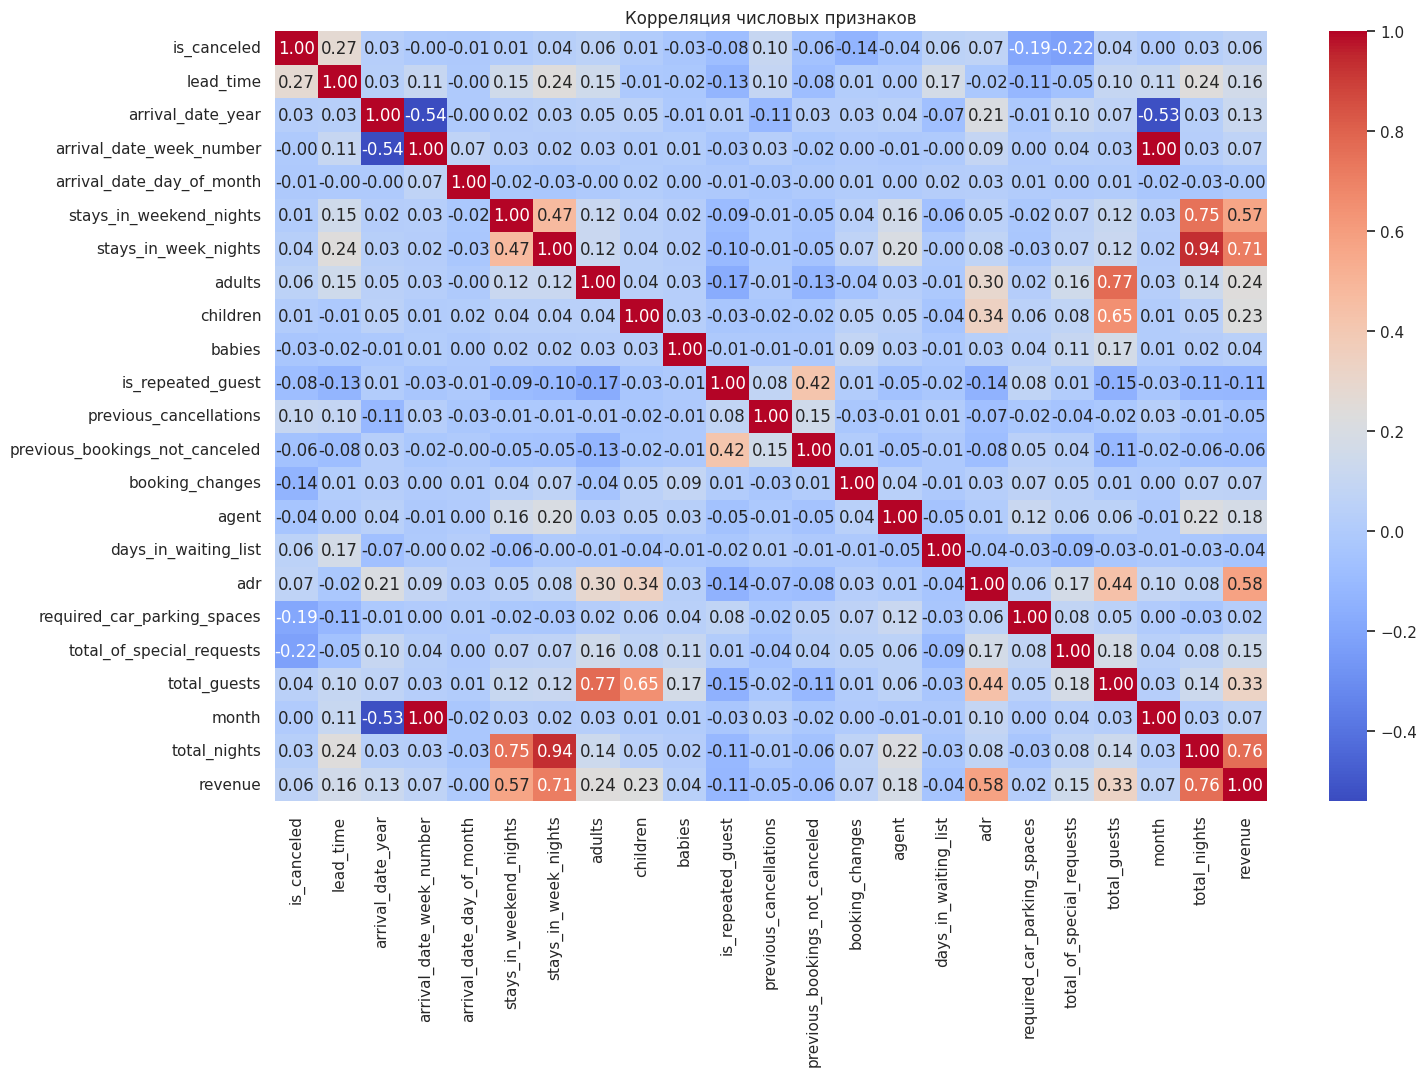

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция числовых признаков')
plt.show()

Наблюдаем довольно хорошую корреляцию между постоянным гостем и отсутствием бронирований, такие клиенты уже не впервые останавливаются в определенном отеле и сложилось доверие, поэтому отмен нет.

In [ ]:
df.to_csv('processed_data.csv', index=False)
files.download('processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Выводы и рекомендации**

Данные были преобразованы и очищены. Это позволит выработать единую иерархию метрик и внедрить их в компанию. Анализ поведения клиентов и структуры отмен позволил определить ключевых стейкхолдеров и выделить значимые метрики, влияющих на успех бизнеса. Анализ ключевых факторов, влияющих на вероятность отмены (в том числе: lead_time, market_segment, distribution_channel, сезонность и депозит), позволил выявить поведенческие паттерны клиентов и определить, какие условия наиболее сильно влияют на нестабильность бронирований.

Рекомендуется расширить исходный датасет следующими полями: идентификатор гостя, цена за бронирование на момент подтверждения, дата фактического заезда/выезда, причина отмены (если доступна), каналы привлечения.